In [1]:
# import networkx as nx
# import networkx.algorithms.community as nx_comm
# import matplotlib
# import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick
# 
# import pandas as pd
# import seaborn as sns
# import numpy as np
# from pysankey import sankey

# %matplotlib inline

# matplotlib.use("pgf")
# sns.set_theme(style='white')
# plt.rcParams["axes.linewidth"] = 0.5
# plt.rcParams["legend.fontsize"] = 6.5
# plt.rcParams["xtick.labelsize"] = 8
# plt.rcParams["ytick.labelsize"] = 8
# plt.rcParams["ytick.left"] = True
# plt.rcParams['ytick.major.size'] = 5
# plt.rcParams['ytick.major.width'] = 0.5
# plt.rcParams['ytick.major.pad'] = 0
# plt.rcParams["xtick.bottom"] = True
# plt.rcParams['xtick.major.size'] = 5
# plt.rcParams['xtick.major.width'] = 0.5
# plt.rcParams['xtick.major.pad'] = 0
# plt.rcParams["pgf.texsystem"] = "pdflatex"
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["text.usetex"] = True
# plt.rcParams["pgf.rcfonts"] = False
# plt.rcParams["axes.titlesize"] = 8
# plt.rcParams["legend.handletextpad"] = 0.3
# plt.rcParams['lines.markersize'] = 4
# plt.rcParams['savefig.pad_inches'] = 0.01
# 

#plt.style.use("seaborn-whitegrid")
#sns.set_palette("deep")
#sns.set_context("notebook")  # Set to "paper" for use in paper :)

#plt.rcParams['figure.figsize'] = (10, 6)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import logging
import matplotlib.pyplot as plt

from sec_certs.dataset.fips import FIPSDataset
from collections import Counter

# Typing imports
from pandas.core.frame import DataFrame


sns.set_palette("deep")

In [2]:
dset = FIPSDataset.from_web_latest()

In [3]:
df = dset.to_pandas()

In [4]:
df.head()

,cert_id,name,status,standard,type,level,embodiment,date_validation,date_sunset,algorithms,...,related_cves,module_directly_referenced_by,module_indirectly_referenced_by,module_directly_referencing,module_indirectly_referencing,policy_directly_referenced_by,policy_indirectly_referenced_by,policy_directly_referencing,policy_indirectly_referencing,year_from
dgst,,,,,,,,,,,,,,,,,,,,,
803919e93ccac91d,4307,Cocoon Data Content Crypto Service,active,FIPS 140-2,Software,1.0,Multi-Chip Stand Alone,2022-09-20,2024-08-22,"{SHS#A2605, AES#A2605, HMAC#A2113, SHA-3#A1641...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
ab86fe44dea15e7a,4143,Samsung NVMe TCG Opal SSC SEDs PM1733 Series,active,FIPS 140-2,Hardware,2.0,Multi-Chip Stand Alone,2022-02-03,2026-09-21,"{DRBG#C1292, AES#C1271, RSA#C1293, SHS#C1272}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
705249ef258f9318,4078,Qualcomm® Trusted Execution Environment (TEE) ...,active,FIPS 140-2,Software-Hybrid,1.0,Single Chip,2021-11-29,2026-09-21,"{SHS#A764, RSA#A982, SHS#A982, CVL#A982, HMAC#...",...,NaN,NaN,NaN,{3114},{3114},NaN,NaN,{3114},{3114},2021
a2730bca63eff586,4195,Thales Luna Backup HSM Cryptographic Module,active,FIPS 140-2,Hardware,3.0,Multi-Chip Stand Alone,2022-04-14,2026-09-21,"{PBKDF#A2125, RSA#C2022, RSA#A675, KAS#A2125, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
c62b377fa3d3a0f4,3926,DIGISTOR TCG OPAL SSC FIPS SSD Series,active,FIPS 140-2,Hardware,2.0,Multi-Chip Embedded,2021-05-11,2026-05-10,"{DRBG#C1358, AES#C1356, KTS#C1356, KTS#C1358, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


## Exploratory Data Analysis

In [5]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 4535 rows and 23 columns.


In [6]:
total_active_certs: int = df[df["status"] == "active"].shape[0]
total_historical_certs: int = df[df["status"] == "historical"].shape[0]
total_revoked_certs: int = df[df["status"] == "revoked"].shape[0]

print(f"Total number of active certs: {total_active_certs}")
print(f"Total number of historical certs: {total_historical_certs}")
print(f"Total number of revoked certs: {total_revoked_certs}")

Total number of active certs: 944
Total number of historical certs: 3567
Total number of revoked certs: 24


### Status distribution of certificates

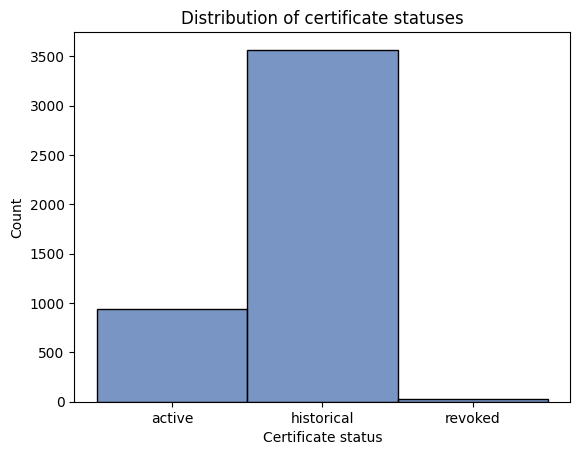

In [7]:
sns.histplot(data=df["status"])
plt.title("Distribution of certificate statuses")
plt.xlabel("Certificate status")
plt.show()

### Type distribution of certificates

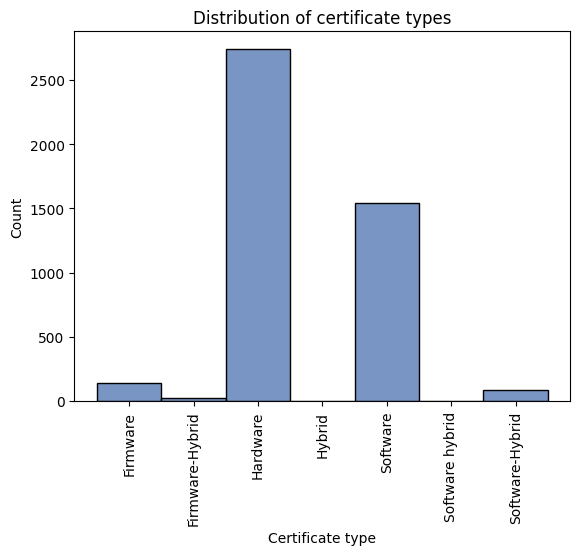

In [8]:
sns.histplot(data=df["type"])
plt.title("Distribution of certificate types")
plt.xlabel("Certificate type")
plt.xticks(rotation=90) 
plt.show()

### Standard distribution of certificates

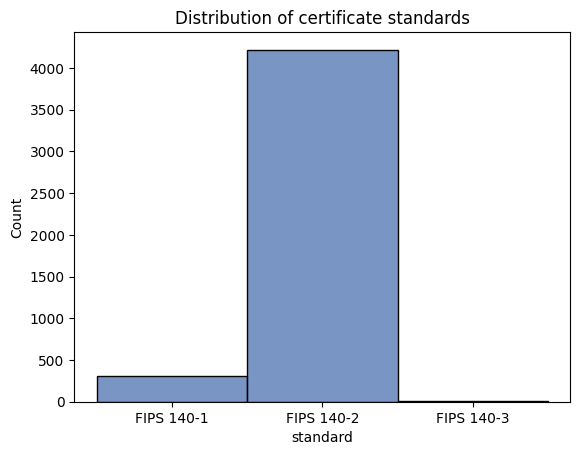

In [9]:
sns.histplot(data=df["standard"])
plt.title("Distribution of certificate standards")
plt.show()

### Distribution of embodiment in the dataset

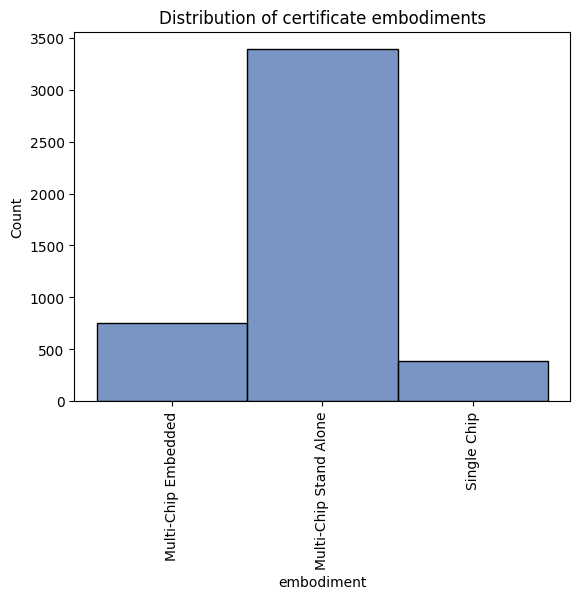

In [10]:
sns.histplot(data=df["embodiment"])
plt.title("Distribution of certificate embodiments")
plt.xticks(rotation=90) 
plt.show()

### Twenty most common CPEs in the dataset

In [11]:
cpe_certs_df: DataFrame = df[df["cpe_matches"].notna()]

print(f"Number of certificates with at least one CPE match: {cpe_certs_df.shape[0]}")

Number of certificates with at least one CPE match: 465


In [12]:
cpe_counter = Counter()
cpe_matches_per_cert: list[int] = []

for cpes in cpe_certs_df["cpe_matches"]:
    cpe_counter.update(cpes)
    cpe_matches_per_cert.append(len(cpes))

cpe_counter.most_common(20)

[('cpe:2.3:o:redhat:enterprise_linux:8.0:*:*:*:*:*:*:*', 19),
 ('cpe:2.3:o:redhat:enterprise_linux:8.1:*:*:*:*:*:*:*', 19),
 ('cpe:2.3:o:redhat:enterprise_linux:8.4:*:*:*:*:*:*:*', 19),
 ('cpe:2.3:o:redhat:enterprise_linux:8.5.0:*:*:*:*:*:*:*', 19),
 ('cpe:2.3:o:redhat:enterprise_linux:8.0:*:*:*:-:*:*:*', 19),
 ('cpe:2.3:o:redhat:enterprise_linux:8.6:*:*:*:*:*:*:*', 19),
 ('cpe:2.3:o:redhat:linux:8.0:*:*:*:*:*:*:*', 19),
 ('cpe:2.3:o:oracle:linux:7:0:*:*:*:*:*:*', 19),
 ('cpe:2.3:o:oracle:linux:7:1:*:*:*:*:*:*', 19),
 ('cpe:2.3:o:oracle:linux:7:2:*:*:*:*:*:*', 19),
 ('cpe:2.3:o:oracle:linux:7:3:*:*:*:*:*:*', 19),
 ('cpe:2.3:o:oracle:linux:7:-:*:*:*:*:*:*', 19),
 ('cpe:2.3:h:cisco:catalyst_6509-e:-:*:*:*:*:*:*:*', 15),
 ('cpe:2.3:h:cisco:catalyst_6506-e:-:*:*:*:*:*:*:*', 15),
 ('cpe:2.3:a:mcafee:network_security_platform:9.1:*:*:*:*:*:*:*', 12),
 ('cpe:2.3:h:juniper:mx240:-:*:*:*:*:*:*:*', 11),
 ('cpe:2.3:h:juniper:mx480:-:*:*:*:*:*:*:*', 11),
 ('cpe:2.3:h:juniper:mx960:-:*:*:*:*:*:*:*'

### CPE matches data extraction

Text(0.5, 1.0, 'Boxplot of total cpe matches per certificate')

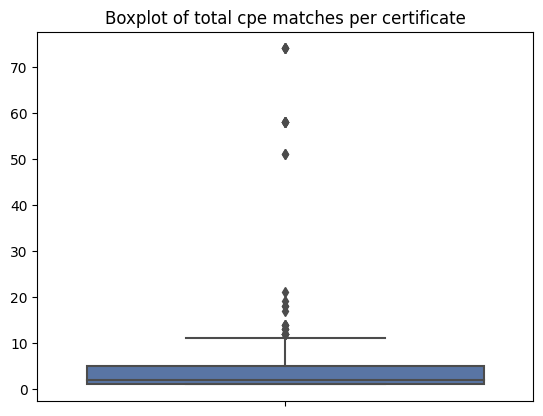

In [13]:
# Boxplot
sns.boxplot(y=cpe_matches_per_cert)
plt.title("Boxplot of total cpe matches per certificate")

In [14]:
# NOTE: We are calculating over "cpe_matches", since every cert has "verified_cpe_matches" equal to NaN
maximum_cpe_matches: int = max(cpe_matches_per_cert)
minimum_cpe_matches: int = min(cpe_matches_per_cert)
mean_cpe_matches: int = np.mean(cpe_matches_per_cert)
median_cpe_matches: int = np.median(cpe_matches_per_cert)
quantile_25 = np.percentile(cpe_matches_per_cert, 25)
quantile_75 = np.percentile(cpe_matches_per_cert, 75)
iqr = quantile_75 - quantile_25

print(f"Maximum cpe_matches: {maximum_cpe_matches}")
print(f"Minimum cpe_matches: {minimum_cpe_matches}")
print(f"Mean cpe_matches: {round(mean_cpe_matches, 2)}")
print(f"Median cpe_matches: {median_cpe_matches}")
print(f"First quartile: {quantile_25}")
print(f"Third quartile: {quantile_75}")
print(f"IQR: {iqr}")

Maximum cpe_matches: 74
Minimum cpe_matches: 1
Mean cpe_matches: 4.93
Median cpe_matches: 2.0
First quartile: 1.0
Third quartile: 5.0
IQR: 4.0


In [15]:
max_cpe_matches_df: DataFrame = cpe_certs_df[cpe_certs_df["cpe_matches"].apply(lambda x: len(x) == maximum_cpe_matches)]
max_cpe_matches_df

,cert_id,name,status,standard,type,level,embodiment,date_validation,date_sunset,algorithms,...,related_cves,module_directly_referenced_by,module_indirectly_referenced_by,module_directly_referencing,module_indirectly_referencing,policy_directly_referenced_by,policy_indirectly_referenced_by,policy_directly_referencing,policy_indirectly_referencing,year_from
dgst,,,,,,,,,,,,,,,,,,,,,
926a7fc32c08e491,989,Windows XP Enhanced Cryptographic Provider (RS...,historical,FIPS 140-2,Software,1.0,Multi-Chip Stand Alone,2008-07-24,NaT,"{RNG#447, SHS#783, Triple-DES#675, RSA#371, Tr...",...,"{CVE-2011-2005, CVE-2005-0058, CVE-2010-3974, ...",NaN,NaN,NaN,NaN,{2009},{2009},NaN,NaN,2008
fe50b64954720ccb,990,Windows XP Enhanced DSS and Diffie-Hellman Cry...,historical,FIPS 140-2,Software,1.0,Multi-Chip Stand Alone,2008-07-24,NaT,"{DSA#292, Triple-DES MAC#676, RNG#448, SHS#784...",...,"{CVE-2011-2005, CVE-2005-0058, CVE-2010-3974, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
749fc650cacb0f06,241,Kernel Mode Cryptographic Module for Windows XP,historical,FIPS 140-1,Software,1.0,Multi-Chip Stand Alone,2002-08-01,NaT,"{Triple-DES#16, HMAC-SHA-1#35, DSA/SHA-1#35}",...,"{CVE-2011-2005, CVE-2005-0058, CVE-2010-3974, ...",NaN,NaN,NaN,NaN,NaN,NaN,{106},{106},2002
6af1f692e9496c6d,240,DSS/Diffie-Hellman Enhanced Cryptographic Prov...,historical,FIPS 140-1,Software,1.0,Multi-Chip Stand Alone,2002-08-01,NaT,"{DSA/SHA-1#29, Triple-DES#16}",...,"{CVE-2011-2005, CVE-2005-0058, CVE-2010-3974, ...",NaN,NaN,NaN,NaN,{433},{433},NaN,NaN,2002


In [16]:
min_cpe_matches_df: DataFrame = cpe_certs_df[cpe_certs_df["cpe_matches"].apply(lambda x: len(x) == minimum_cpe_matches)]
min_cpe_matches_df

,cert_id,name,status,standard,type,level,embodiment,date_validation,date_sunset,algorithms,...,related_cves,module_directly_referenced_by,module_indirectly_referenced_by,module_directly_referencing,module_indirectly_referencing,policy_directly_referenced_by,policy_indirectly_referenced_by,policy_directly_referencing,policy_indirectly_referencing,year_from
dgst,,,,,,,,,,,,,,,,,,,,,
71cadd0c63e57249,4472,Amazon Linux 2 GnuTLS Cryptographic Module,active,FIPS 140-2,Software,1.0,Multi-Chip Stand Alone,2023-04-14,2025-04-19,"{AES#C791, AES#C792, SHS#C790, HMAC#C792, AES#...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
9931f287c490c562,3618,Amazon Linux 2 Libgcrypt Cryptographic Module,active,FIPS 140-2,Software,1.0,Multi-Chip Stand Alone,2020-02-19,2025-02-18,"{HMAC#C693, Triple-DES#C693, DSA#C693, DRBG#C6...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
03f65a290e11d786,3908,Juniper Networks NFX250 Network Services Platform,active,FIPS 140-2,Hardware,1.0,Multi-Chip Stand Alone,2021-04-23,2026-04-22,"{ECDSA#C1981, RSA#C1981, DRBG#C1981, Triple-DE...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
7119d5d9637ddeeb,3717,Juniper Networks NFX150 Network Services Platform,active,FIPS 140-2,Hardware,1.0,Multi-Chip Stand Alone,2020-09-28,2025-09-27,"{DRBG#C947, HMAC#C970, DRBG#C942, SHS#C943, HM...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
f36e412aea00d7c6,4519,Cisco Catalyst 9400 Series Switches,active,FIPS 140-2,Hardware,1.0,Multi-Chip Stand Alone,2023-05-11,2026-03-02,"{RSA#C220, CVL#A1462, HMAC#A1462, DSA#C431, KB...",...,NaN,NaN,NaN,{3637},{3637},NaN,NaN,{3637},{3637},2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9cbfc3c153a29e5c,2593,Network Security Platform Sensor NS-9300 S,historical,FIPS 140-2,Hardware,2.0,Multi-Chip Stand Alone,2016-03-29,NaT,"{RSA#1825, CVL#599, DRBG#649, AES#3156, RSA#16...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
1625f9db144171f7,1750,IDProtect Key with LASER PKI,historical,FIPS 140-2,Hardware,3.0,Single Chip,2012-07-17,NaT,"{KTS#1654, ECDSA#214, CVL#2, AES#1654, RSA#824...",...,{CVE-2019-15809},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012
15bb14fd69723b98,3580,Network Security Platform Sensor NS9100 and NS...,historical,FIPS 140-2,Hardware,2.0,Multi-Chip Stand Alone,2019-12-09,NaT,"{RSA#2638, KTS#C409, DRBG#C409, SHS#C409, SHS#...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


### Ten most common CVEs in the dataset

In [17]:
cve_certs_df: DataFrame = df[df["related_cves"].notna()]

print(f"Number of certificates with at least one CVE: {cve_certs_df.shape[0]}")

Number of certificates with at least one CVE: 220


In [18]:
cve_counter = Counter()

for cves in cve_certs_df["related_cves"]:
    cve_counter.update(cves)

cve_counter.most_common(10)

[('CVE-2016-7091', 49),
 ('CVE-2000-0701', 45),
 ('CVE-1999-0037', 45),
 ('CVE-1999-1288', 45),
 ('CVE-2001-0690', 45),
 ('CVE-2000-1207', 45),
 ('CVE-2001-0889', 45),
 ('CVE-2007-3103', 45),
 ('CVE-2000-0017', 45),
 ('CVE-1999-0894', 45)]

### Ten most common crypto algorithms used

In [19]:
crypto_algo_counter = Counter()

for algorithms in df["algorithms"]:
    crypto_algo_counter.update(algorithms)

crypto_algo_counter.most_common(10)

[('RSA#1', 180),
 ('Triple-DES#34', 45),
 ('SHS#1954', 35),
 ('HMAC#1391', 35),
 ('RSA#1166', 35),
 ('ECDSA#368', 35),
 ('AES#2273', 35),
 ('DSA#709', 35),
 ('DRBG#281', 35),
 ('Triple-DES#1420', 35)]

## Analysis of FIPS references

In [26]:
refs_columns: list[str] = [
    "cert_id", 
    "status",
    "standard",
    "type",
    "level",
    "embodiment",
    "module_directly_referenced_by", 
    "module_indirectly_referenced_by",
    "module_directly_referencing",
    "module_indirectly_referencing",
    "policy_directly_referenced_by",
    "policy_indirectly_referenced_by",
    "policy_directly_referencing",
    "policy_indirectly_referencing",
]

In [27]:
refs_df = df[refs_columns]

### Active certificates which reference at least one historical cert (=module refs)

In [42]:
def get_cert_status(dataset: DataFrame, cert_id: int) -> str | None:
    sub_df = refs_df[refs_df["cert_id"] == int(cert_id)]
    
    if sub_df.shape[0] == 0:  # Certificate is not in the dataset
        print(f"Cert ID: {cert_id} not in dataset")
        return None
    
    if sub_df.shape[0] > 1:  # There are more than one occurence with same ID
        print(f"Error Cert ID: {cert_id} has {sub_df.shape[0]} occurrences.")
        return None
    
    return sub_df.iloc[0]["status"]

def is_cert_referencing_historical_cert(dataset: DataFrame, cert_ids: set[int]) -> bool:
    return "historical" in [get_cert_status(dataset, cert_id) for cert_id in cert_ids]

In [59]:
active_certs_referencing_historical: list[int] = []
active_referencing_certs: DataFrame = refs_df[(refs_df["status"] == "active") & (refs_df["module_directly_referencing"].notna())]

for _, rows in active_referencing_certs.iterrows():
    referencing_ids = rows["module_directly_referencing"]
        
    if is_cert_referencing_historical_cert(refs_df, referencing_ids):
        active_certs_referencing_historical.append(rows.cert_id)

print(f"Total active certificates referencing at least one historical: {len(active_certs_referencing_historical)}")
print(f"Total active certificates referencing at least one certificate: {len(active_referencing_certs)}")
print(f"Hit ratio: {len(active_certs_referencing_historical) / len(active_referencing_certs)}")

Total active certificates referencing at least one historical: 12
Total active certificates referencing at least one certificate: 128
Hit ratio: 0.09375
